Import the necessary modules and packages 

In [5]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D
from sklearn.model_selection import train_test_split

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
IMAGE_SIZE = [128,128]

for our model we are taking the image size as 128 * 128 which the input fixed size/ Dimension for the Model so that there will be a uniqueness.

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1/255)

The above code will normalize the image and the range of the pixel's intensity values will lie in range of [0,1].

And also the training set will have some data augmentation preprocessing and testing and training dataset will be as usual(untouched).

## Data Augmentation :
Duplicating the input images by changing its some of the features and
feeding to the model is known to be Augmentation.
Some of the transformations are:

● Flips

● Rotations

● Salt and peper noise addition

● Translation

● Scaling

● Shifting


In our case we will only use the shearing and zoom transformations that too only for training set.
And we kept the values as 0.2 which is 20% shearing and zooming 
and rescale = 1/255 is kept as its normalizing the data by using min max scaler :

formula = Xnew = (Xold - Min([X])) / Max([X]) - Min([X])

In [9]:
training_set=train_datagen.flow_from_directory('C:\\Users\\laptopML\\Downloads\\Malaria Cells-20230425T044614Z-001\\Malaria Cells\\training_set',target_size=(128,128),batch_size=600,shuffle=True)

Found 27698 images belonging to 2 classes.


The above code will take all the images from the path and assigns some suffling so that overfitting will be reduced.

Note - batch size should be the len of your dataset in our case its 27558 so we kept batch size as 27558.

In [10]:
training_set

In [11]:
testing_set=test_datagen.flow_from_directory('C:\\Users\\laptopML\\Downloads\\Malaria Cells-20230425T044614Z-001\\Malaria Cells\\testing_set',target_size=(128,128),batch_size=420,shuffle=True)

Found 16032 images belonging to 2 classes.


The above output is showing that the dataset which we loaded is an iterator object so we can access the actual dataset by using .next() key word.

In [12]:
x,y=training_set.next()
x,y 

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

The above code will take some time to load the data

In [13]:
x[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

# Visualizing images from each class 

C:\Users\laptopML\anaconda3\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


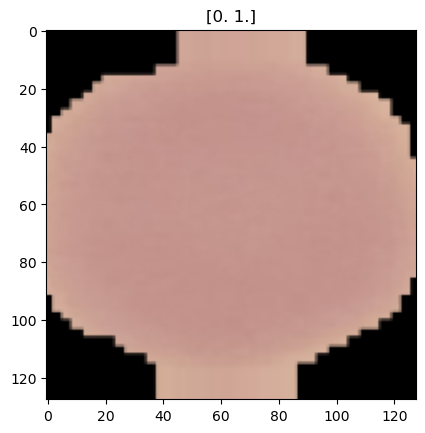

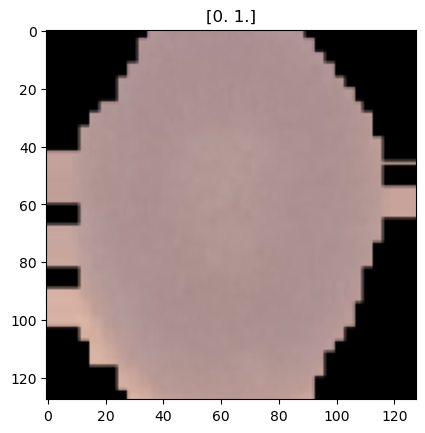

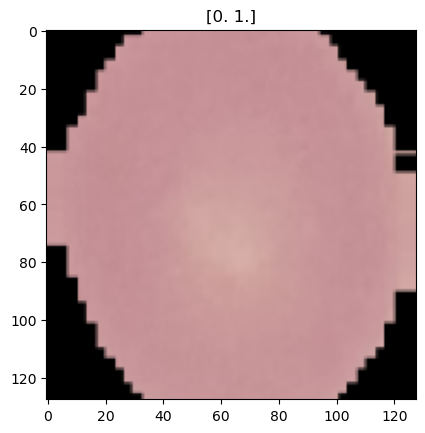

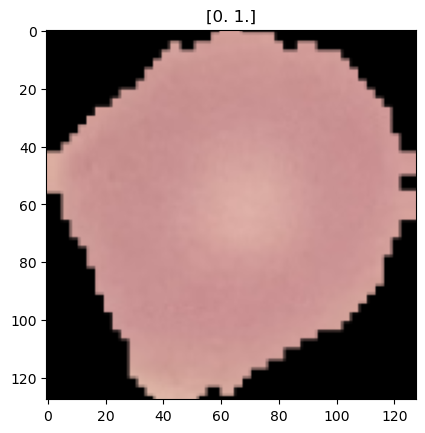

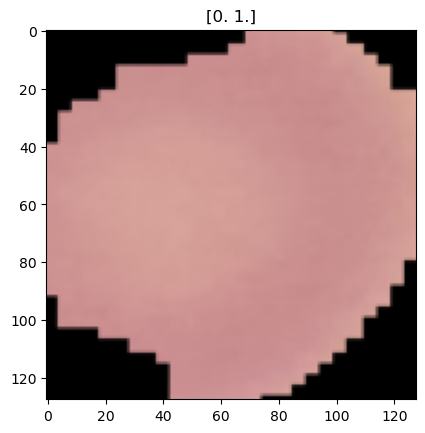

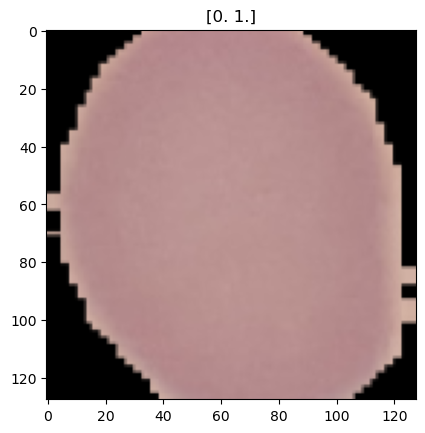

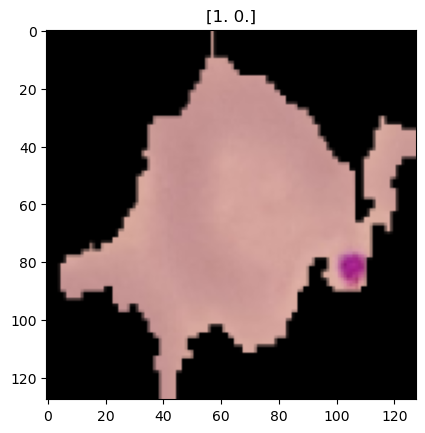

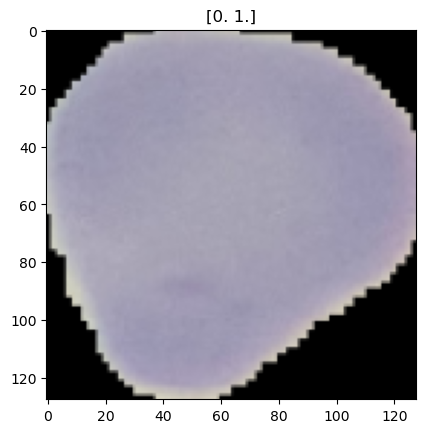

In [10]:
for i in range(8):
    plt.imshow(x[i])
    plt.title(y[i])
    plt.show()

This is how the normalized image looks like 

In [14]:
import seaborn as sns

# Model building starts

In [15]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(128,128,3)))
model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=3))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=3))
model.add(Dropout(0.4))
#model.add(Dropout(0.2))
# model.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))
# model.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))
# #model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(700,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(30,activation='relu'))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      2320      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 42, 42, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 42, 42, 32)        2

This above snippet / block is changed again again so that to get a best result and the final architecture kept at final.

The details of some of the above used functions are given below :
   ## Specifically we will be using CNN
### WHAT IS IT AND WHY CNN ?
CNN is Convolutional Neural network which is widely used of image classification
/ object classification.
The basic CNN architecture will look like :

![The-architecture-of-standard-deep-CNN-CNN-std-for-off-target-prediction-The-input-of.png](attachment:The-architecture-of-standard-deep-CNN-CNN-std-for-off-target-prediction-The-input-of.png)

It is a combination of convolutional layers and artificial neural network / fully
connected network.
The output of the convolutional layers are flattened and fed to the ANN which
now is able to classify the images.

## Model Building
For this we have to import sequential and then we have to add different layers of
convolution , max pooling , strides and fully connected network .
Initially we will start with VGG style architecture because it is widely used and
mostly these are very efficient. And later on by looking to the accuracy we will
make some changes in activation functions , layers , initializers , optimizers ,
batch size , epochs , etc.


## Convolution :

![0_e-SMFTzO8r7skkpc.png](attachment:0_e-SMFTzO8r7skkpc.png)

## Strides:
![th%20%282%29.jpeg](attachment:th%20%282%29.jpeg)

## Max pooling
![Screenshot-2019-07-21-at-2.57.13-AM.png](attachment:Screenshot-2019-07-21-at-2.57.13-AM.png)

## Padding :
![1_Pd4aewh7AEHy7LlirrLRGA.jpeg](attachment:1_Pd4aewh7AEHy7LlirrLRGA.jpeg)

## Flattening :
![73_blog_image_1.png](attachment:73_blog_image_1.png)

#### Here in this code we have added convolution as our first layer which is 2d
#### we also have the option of 3d which we will not not use for time being.
#### In this code the very first parameter 16 is the filter size which indicates
#### that there will be 16 times convolutions performed on the input sample.
#### (3,3) which is the second parameter indicates the kernel size. Basically
#### the filter we can also write 3 in place of (3,3) will give the same result.
#### We also have different kernel sizes like 2, 3 , 5, etc . but in this model we
#### will be using 3 as for the first base model.

# Activation Function
Activation Function was kept relu this is because relu performs very well
in any kind of classification model. To put in simple terms, an artificial
neuron calculates the ‘weighted sum’ of its inputs and adds a bias. The
value of net input can be anything from -inf to +inf. The neuron doesn’t
really know how to bound to value and thus is not able to decide the firing
pattern. Thus the activation function is an important part of an artificial
neural network. They basically decide whether a neuron should be
activated or not. Thus it bounds the value of the net input.
The activation function is a non-linear transformation that we do over the
input before sending it to the next layer of neurons or finalizing it as
output.An activation function is the last component of the convolutional
layer to increase the non-linearity in the output. Generally, ReLu function
or Tanh function is used as an activation function in a convolution layer.We
have an input data for the activation function. For every value in the input
a function is applied. For example, we have 3 layers of 128 * 128 pixels
(128x128x3). Activation function is applied to all values and returns the
same dimensions. The result is 128 X 128 X 3. For example, we have Relu and
the input is 0..255 values for RGB colors of the image. The output will not
be different from the input because all the values are positive.

![image.png](attachment:image.png)

Padding is kept ‘same’ in our code which means that there will be
padding for input samples so that output of the filter will be of the same
size as input.

We can also keep padding as None as another option. But in or case we
made it same.

Input_shape – This parameter should be given for the first layer only as
our image samples are the input for first layer. Coming to the next layers
we can ignore this as keras is capabel of knowing the shapes for hidden
layers. So input shape should be the shape of our image (128,128,3).

## Activation for last / output layer is kept as softmax:
Here the softmax is very useful because it converts the scores to a
normalized probability distribution, which can be displayed to a user or
used as input to other systems. For this reason it is usual to append a
softmax function as the final layer of the neural network.
It also generates the probability of occurring a particular class
which we can further decide according to our convenience.

![image.png](attachment:image.png)

In our case its binary classification so output layer has only 2 neurons

# Dropout regularization:
Deep learning neural networks are likely to quickly overfit a training dataset with
few examples.
Ensembles of neural networks with different model configurations are known to
reduce overfitting, but require the additional computational expense of training
and maintaining multiple models.
A single model can be used to simulate having a large number of different
network architectures by randomly dropping out nodes during training. This is
called dropout and offers a very computationally cheap and remarkably effective
regularization method to reduce overfitting and improve generalization error in
deep neural networks of all kinds.
![image.png](attachment:image.png)

The fraction of neurons to be zeroed out is known as the dropout rate Rd. The
remaining neurons have their values multiplied by 1/(1-Rd) so that the overall
sum of the neuron values remains the same.
In this case, we will add Dropout layers after each max pooling layer and after
the fully connected layer.
![image.png](attachment:image.png)

In [17]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Loss function – categorical_crossentropy
Generally the loss function is used to compute the quantity that the the model
should seek to minimize during training. For regression models, the commonly
used loss function used is mean squared error function while for classification
models predicting the probability, the loss function most commonly used is cross
entropy.
Cross entropy loss function is an optimization function which is used in case of
training a classification model which classifies the data by predicting the
probability of whether the data belongs to one class or the other class. One of the
examples where Cross entropy loss function is used is Logistic Regression.
The other variants of loss functions are:
     Binary cross entropy
     Sparse categorical crossentropy
![image.png](attachment:image.png)

In The above code we kept optimizer as adam which is an alternative for SGD(stichastic Gradient Descent) which is an loss function minimizer.

## Training the model with 20 epochs and 420 as batch size

In [18]:
r=model.fit(training_set,epochs=10,validation_data=testing_set)

Epoch 1/10
47/47 [==============================] - 879s 19s/step - loss: 0.6688 - accuracy: 0.6711 - val_loss: 0.9432 - val_accuracy: 0.5040
Epoch 2/10
47/47 [==============================] - 881s 19s/step - loss: 0.2632 - accuracy: 0.9016 - val_loss: 1.5153 - val_accuracy: 0.5040
Epoch 3/10
47/47 [==============================] - 877s 19s/step - loss: 0.1829 - accuracy: 0.9378 - val_loss: 1.1348 - val_accuracy: 0.5040
Epoch 4/10
47/47 [==============================] - 810s 17s/step - loss: 0.1666 - accuracy: 0.9456 - val_loss: 0.9929 - val_accuracy: 0.5040
Epoch 5/10
47/47 [==============================] - 744s 16s/step - loss: 0.1583 - accuracy: 0.9480 - val_loss: 1.2200 - val_accuracy: 0.5040
Epoch 6/10
47/47 [==============================] - 766s 16s/step - loss: 0.1475 - accuracy: 0.9496 - val_loss: 1.5954 - val_accuracy: 0.5055
Epoch 7/10
47/47 [==============================] - 746s 16s/step - loss: 0.1449 - accuracy: 0.9509 - val_loss: 1.6087 - val_accuracy: 0.5087
Epoch 

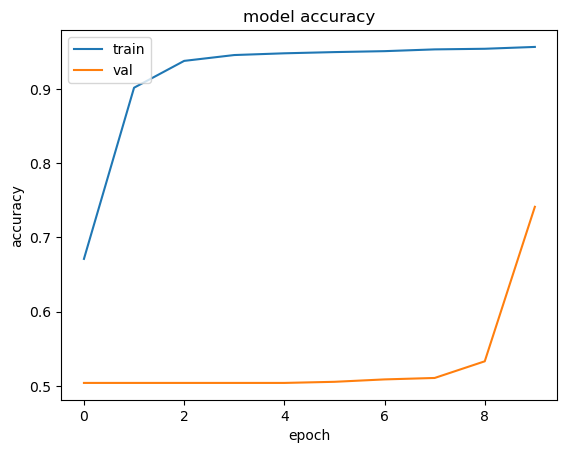

In [19]:
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

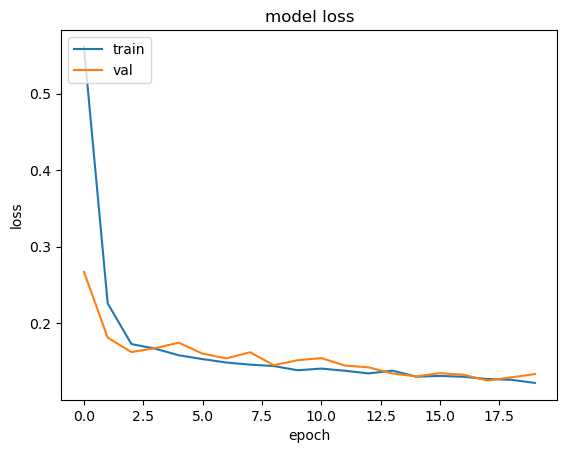

In [17]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])


plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The above code shows the loss vs epoch and accuracy vs epochs for both training set and validation set.

clearly we can see that after epoch no. 5 the model's performance increased and doing its best
lets check the accuracy for the test dataset

In [20]:
testing_set=test_datagen.flow_from_directory('C:\\Users\\laptopML\\Downloads\\Malaria Cells-20230425T044614Z-001\\Malaria Cells\\testing_set',target_size=(128,128),batch_size=16032,shuffle=True)

Found 16032 images belonging to 2 classes.


In [21]:
x_test,y_test=testing_set.next()

In [22]:
predy=model.predict(x_test)

501/501 [==============================] - 86s 170ms/step


In [21]:
import numpy as np
predy1=np.argmax(predy,axis=1)
predy1

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [23]:
testy=np.argmax(y_test,axis=1)

# Accuracy , F1 score for test dataset

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(testy,predy1)

NameError: name 'predy1' is not defined

<Axes: >

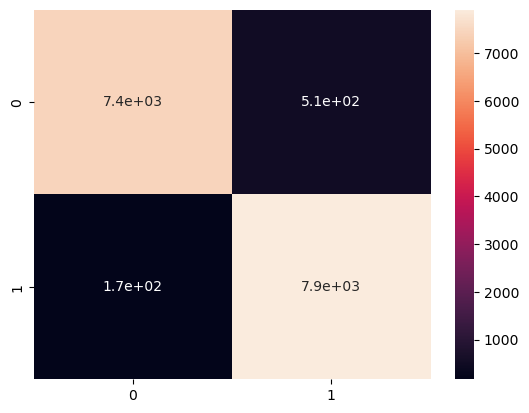

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(testy,predy1),annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(testy,predy1))

In [ ]:
model.save("MLP_model.h5")

If you want to use the model again use the code below

from keras.models import load_model

loaded_model = load_model("MLP_model.h5")

before using this code please download the model file in h5 format and then load to your system .

The saved model is also attached with this file.